# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:
1. Menentukan nilai k atau jumlah cluster yang akan digunakan. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan
2. Menentukan posisi centroid secara random
3. Kemudian dilakukan perhitungan jarak antara data point ke centroid. Kemudian Assign setiap data ke centroid terdekat.
4. Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [2]:
#code here
# Handling missing value
df.fillna(method='ffill', inplace=True)

In [3]:
# Handling Outlier
def outlier_handling(df):
    q1 = df.quantile(0.25)         
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    new_df = df[~((df<(q1-(1.5*iqr))) | (df>(q3+(1.5*iqr))))]
    return new_df

df2 = outlier_handling(df[['Umur', 'Skor Belanja (1-100)']])
df2.dropna(inplace=True)

In [4]:
# Rescaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df2.astype(float))

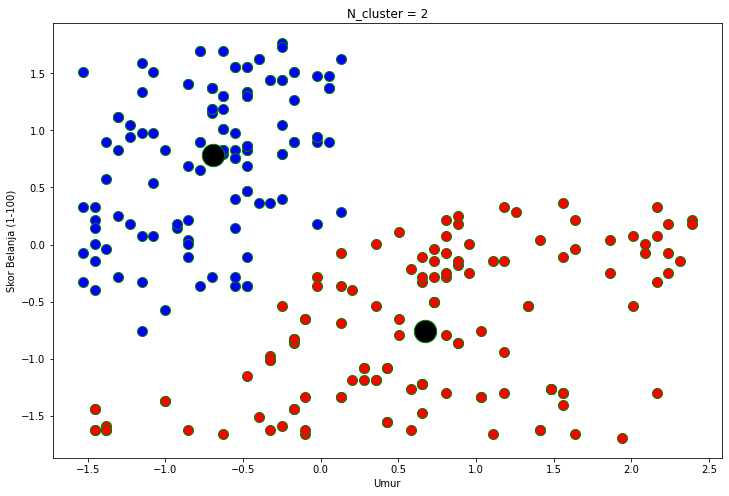

In [5]:
# Clustering k=2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_std)
labels1 = Kmeans1.labels_

new_df = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df['cluster'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(new_df['Umur'][new_df.cluster == 0], new_df['Skor Belanja (1-100)'][new_df.cluster == 0], c='blue', s=100, edgecolor='g')
plt.scatter(new_df['Umur'][new_df.cluster == 1], new_df['Skor Belanja (1-100)'][new_df.cluster == 1], c='red', s=100, edgecolor='g')

plt.scatter(Kmeans1.cluster_centers_[:, 0], Kmeans1.cluster_centers_[:, 1], c='black', s=500, edgecolor='g')
plt.title('N_cluster = 2')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

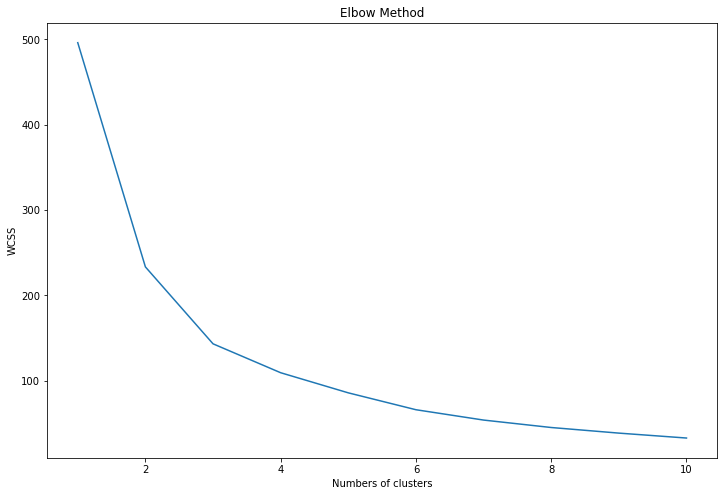

In [6]:
# Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSS')
plt.show()

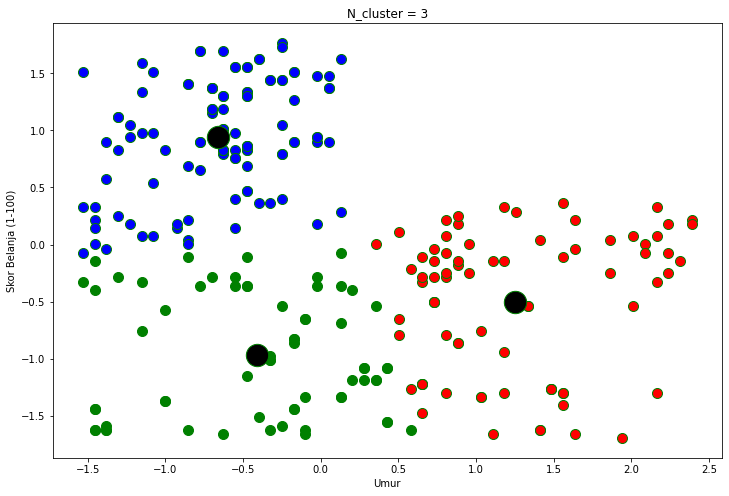

In [7]:
# Clustering k=3
Kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_std)
labels2 = Kmeans2.labels_

new_df2 = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df2['cluster'] = labels2

plt.figure(figsize=(12,8))

plt.scatter(new_df2['Umur'][new_df2.cluster == 0], new_df2['Skor Belanja (1-100)'][new_df2.cluster == 0], c='blue', s=100, edgecolor='g')
plt.scatter(new_df2['Umur'][new_df2.cluster == 1], new_df2['Skor Belanja (1-100)'][new_df2.cluster == 1], c='red', s=100, edgecolor='g')
plt.scatter(new_df2['Umur'][new_df2.cluster == 2], new_df2['Skor Belanja (1-100)'][new_df2.cluster == 2], c='green', s=100, edgecolor='g')
plt.scatter(Kmeans2.cluster_centers_[:, 0], Kmeans2.cluster_centers_[:, 1], c='black', s=500, edgecolor='g')

plt.title('N_cluster = 3')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [8]:
# Silhoutte Coefficient
from sklearn.metrics import silhouette_score
print('K=2')
print(silhouette_score(df_std, labels=labels1))
print('\nK=3')
print(silhouette_score(df_std, labels=labels2))

K=2
0.48555152598842644

K=3
0.4658669848365053


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini: Dari hasil klustering, kita dapat membagi tipe pelanggan menjadi beberapa bagian. Pada klustering dengan k=3 pelanggan dibagi menjadi 3 tipe :
1. Pelanggan umur menengah keatas mempunyai skor belanja menengah kebawah (kluster merah)
2. Pelanggan umur menengah kebawah dengan skor belanja menengah kebawah (kluster hijau)
2. Pelanggan umur menengah kebawah dengan skor belanja menengah keatas (kluster biru)

Dapat disimpulkan bahwa pelanggan yang lebih mudah cenderung mempunyai skor belanja yang lebih tinggi. Skor belanja yang rendah kemungkinan disebabkan oleh pelanggan yang semakin jarang berbelanja seiring bertambah umur.